## Area Plot
---
Area Plot adalah bentuk modifikasi dari line plot, sehingga area plot juga dikenal sebagai Multiple Stacked Line Plot. Dengan menggunakan area plot, kita dapat membandingkan beberapa objek tertentu berdasarkan data berbasis waktu.

### Import Librari & Load Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/SIB_HACKTIVE8/H8_3/PYTN_Assign_1_KS-010_ArifMunandar/london_crime_by_lsoa.csv')

---
**Question:** Wilayah metropolitan London `borough` mana yang memiliki angka kejahatan yang paling besar selama tahun 2008 - 2016

In [3]:
top5_crime = df.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
top5_crime = top5_crime.set_index("year").groupby("borough").sum()
top5_crime = top5_crime.sort_values(by="value", ascending=False).head(5)
top5_crime

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


Berdasarkan output diatas, diketahui bahwa Westminster adalah wilayah metropolitan di London dengan angka kejahatan tertinggi.

In [4]:
df_top5 = df.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_top5 = df_top5.loc[top5_crime.index]
df_top5 = pd.pivot_table(df_top5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_top5

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


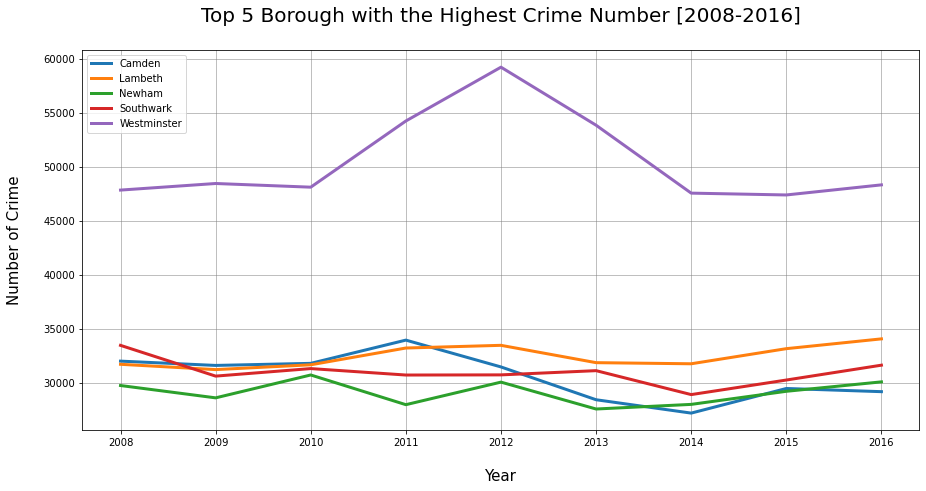

In [6]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top5.plot(kind="line",
             figsize=(15,7),
            linewidth=3)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

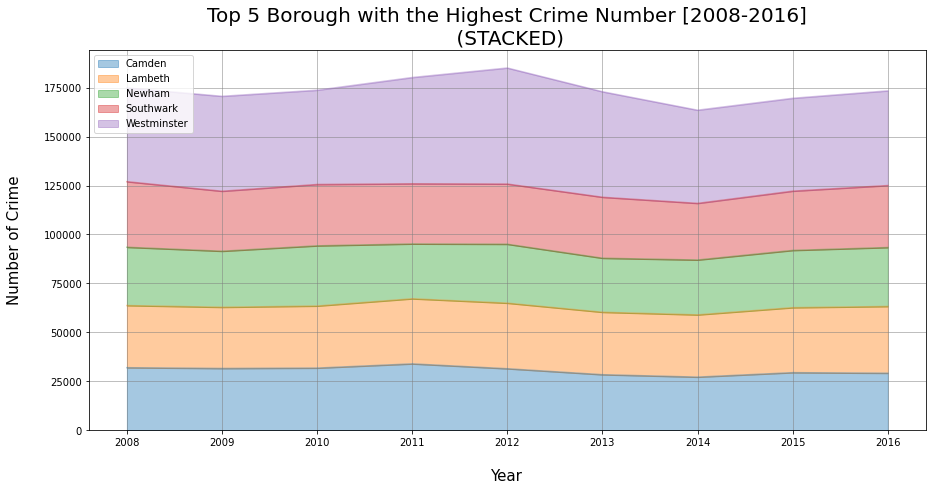

In [7]:
#STACKED AREA PLOT
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=True,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n (STACKED)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

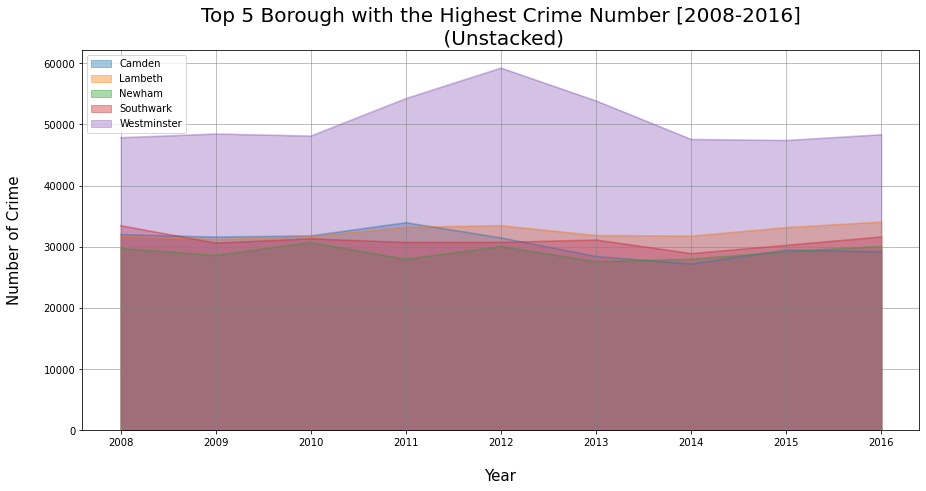

In [8]:
#UNSTACKED AREA PLOT
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=False,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot diatas, dapat diketahui bahwa Westminster memiliki angka kejahatan tertinggi dari tahun 2008 - 2016, diikuti dengan Lambeth, Southwark, Camden dan Newham. Dapat diketahui juga bawha Westminster memiliki angka kejahatan yang sangat tinggi dibandingkan dengan 4 brough lain yakni pada tahun 2012 diikuti penurunan pada tahun 2013 dan tidak mengalami kenaikan dan penurunan yang signifikan sampai tahun 2016.

---
**Question:** Wilayah metropolitan London `borough` mana yang memiliki angka kejahatan paling rendah selama tahun 2008 - 2016?

In [9]:
least5_crime = df.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
least5_crime = least5_crime.set_index("year").groupby("borough").sum()
least5_crime = least5_crime.sort_values(by="value", ascending=True).head(5)
least5_crime

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136


Berdasarkan _output_ diatas, diketahui bahwa City of London adalah wilayah metropolitan yang memiliki angka kejahatan/kriminal terendah yaitu sebesar 780 dari tahun 2008-2016.

In [10]:
df_least5 = df.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_least5 = df_least5.loc[least5_crime.index]
df_least5 = pd.pivot_table(df_least5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_least5

borough,Bexley,City of London,Kingston upon Thames,Richmond upon Thames,Sutton
year,,,,,
2008,15305,0,10661,11106,12943
2009,14445,0,10163,10618,12240
2010,13166,0,10171,10601,12032
2011,11325,69,10155,10896,11068
2012,11669,157,9956,11168,10948
2013,11552,110,9191,10439,10057
2014,11844,115,9288,10456,10443
2015,11990,151,9738,10413,10598
2016,12840,178,9983,11074,10658


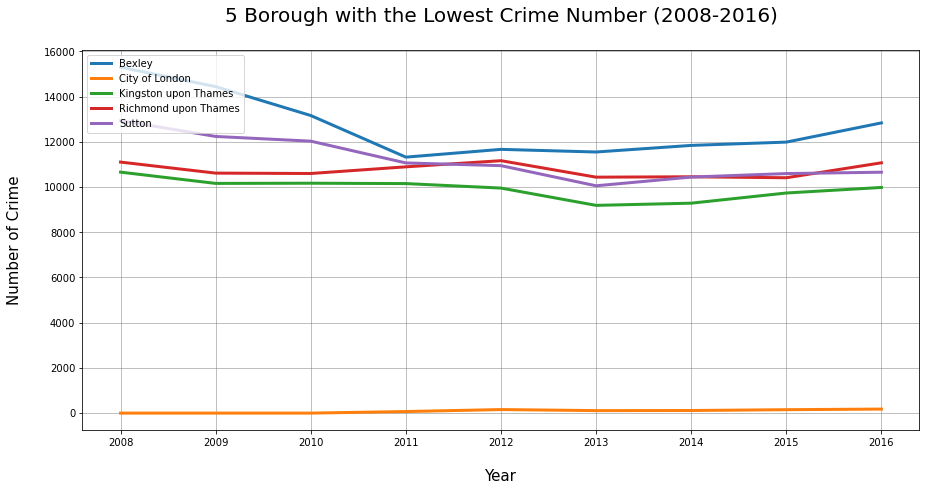

In [11]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_least5.plot(kind="line",
             figsize=(15,7),
            linewidth=3)
plt.title("5 Borough with the Lowest Crime Number (2008-2016)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

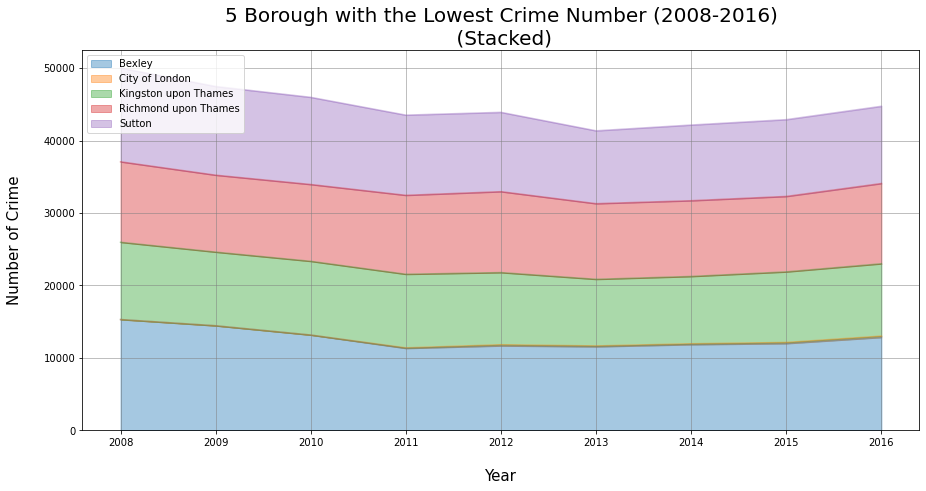

In [12]:
#STACKED AREA PLOT
df_least5.plot(kind="area",
             figsize=(15,7),
             stacked=True,
             alpha = 0.4)
plt.title("5 Borough with the Lowest Crime Number (2008-2016)\n (Stacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

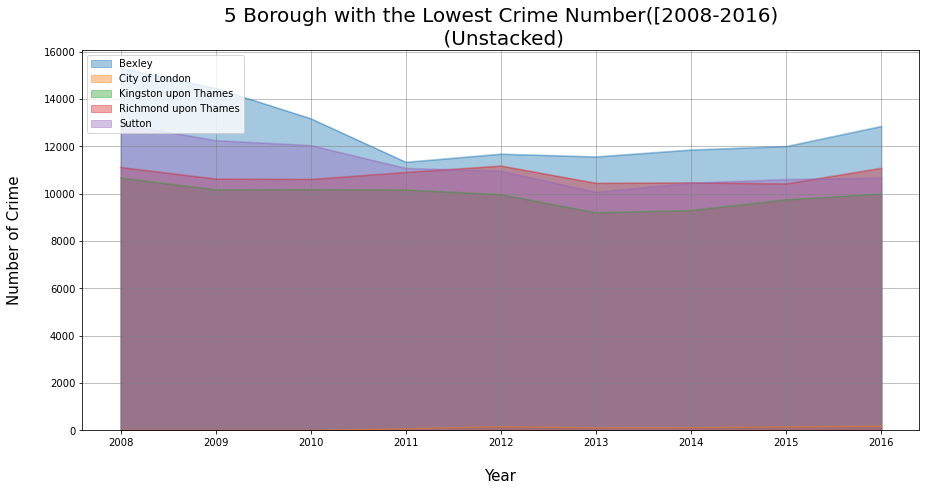

In [13]:
#STACKED AREA PLOT
df_least5.plot(kind="area",
             figsize=(15,7),
             stacked=False,
             alpha = 0.4)
plt.title("5 Borough with the Lowest Crime Number([2008-2016)\n (Unstacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot diatas, diketahui bahwa City of London adalah wilayah metropolitan `borough` yang memiliki angkat kejahatan yang paling rendah di tahun 2008 - 2016 dan diikuti dengan Bexley, Kingston upon Thames, Richmon upon Thames dan Sutton.

---
**Question:** Kategori kejahatan apa saja yang memiliki jumlah tertinggi selama tahun 2008 - 2016?

In [14]:
top5_major = df.drop(['lsoa_code','borough','minor_category','month'],axis=1)
top5_major.set_index("year", inplace=True)
top5_major = top5_major.groupby("major_category").sum()
top5_major = top5_major.sort_values(by="value", ascending=False).head(5)
top5_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


Berdasarkan output diatas, diketahui bahwa jumlah tertinggi kategori kejahatan selama tahun 2008 - 2016 adalah Theft and Handling atau pencurian.

In [15]:
df_top5major = df.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
df_top5major = df_top5major.loc[top5_major.index]
df_top5major = pd.pivot_table(df_top5major, values="value", aggfunc=np.sum, index="year", columns="major_category")
df_top5major

major_category,Burglary,Criminal Damage,Drugs,Theft and Handling,Violence Against the Person
year,,,,,
2008,88092,91872,68804,283692,159844
2009,90619,85565,60549,279492,160777
2010,86826,77897,58674,290924,157894
2011,93315,70914,57550,309292,146901
2012,93392,62158,51776,334054,150014
2013,87222,56206,50278,306372,146181
2014,76053,59279,44435,279880,185349
2015,70489,62976,39785,284022,218740
2016,68285,64071,38914,294133,232381


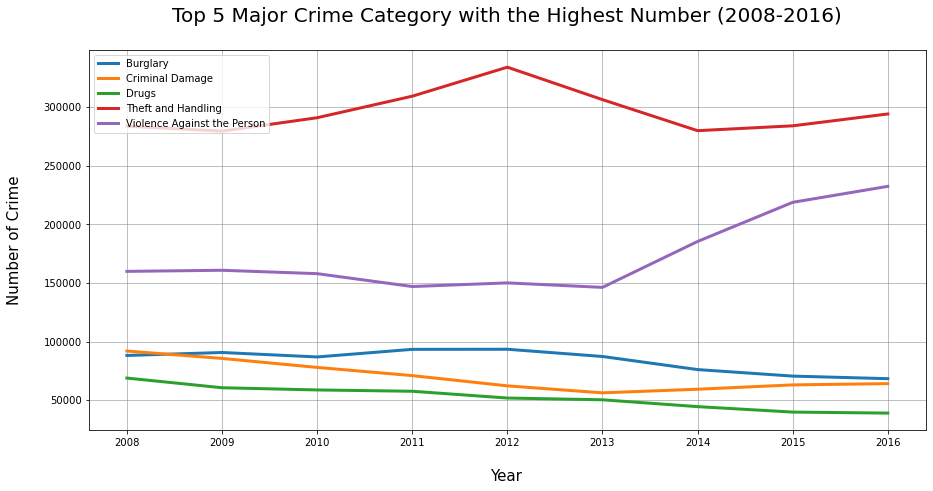

In [16]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top5major.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("Top 5 Major Crime Category with the Highest Number (2008-2016)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

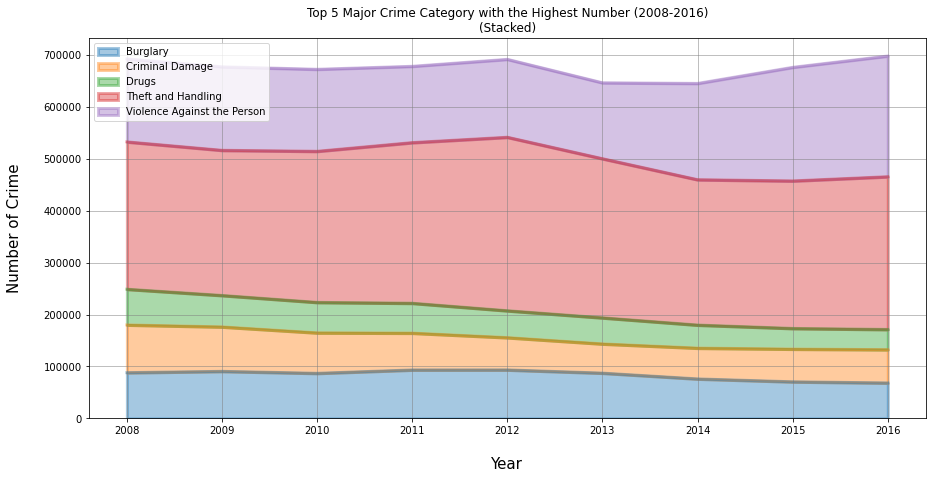

In [17]:
# STACKED AREA PLOT
df_top5major.plot(kind="area",
                figsize=(15,7),
                stacked=True,
                alpha=0.4,
                linewidth=3)
plt.title("Top 5 Major Crime Category with the Highest Number (2008-2016)\n(Stacked)")
plt.xlabel("\nYear",fontsize=15)
plt.ylabel("Number of Crime\n",fontsize=15)
plt.grid(color="grey",linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

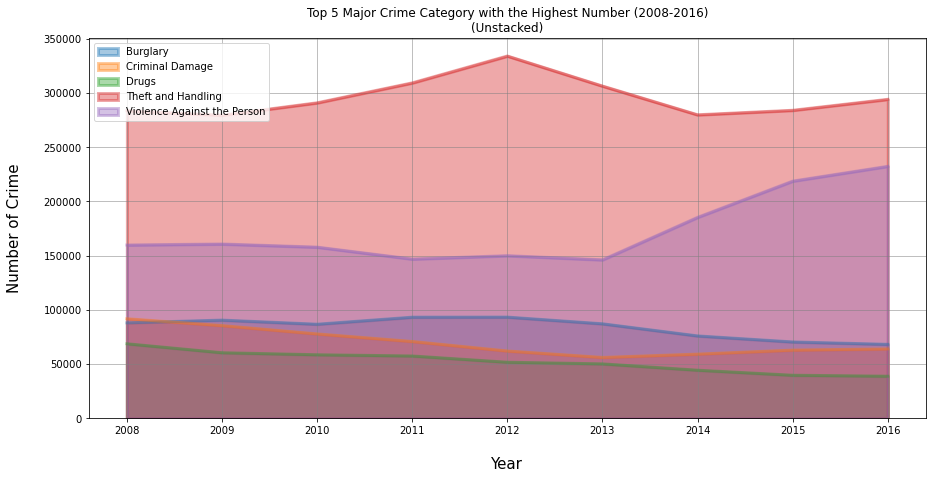

In [18]:
# UNSTACKED AREA PLOT
df_top5major.plot(kind="area",
                figsize=(15,7),
                stacked=False,
                alpha=0.4,
                linewidth=3)
plt.title("Top 5 Major Crime Category with the Highest Number (2008-2016)\n(Unstacked)")
plt.xlabel("\nYear",fontsize=15)
plt.ylabel("Number of Crime\n",fontsize=15)
plt.grid(color="grey",linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot diatas, dapat diketahui bahwa secara grafis, kategori Theft and Handling adalah kategori kejahatan yang memiliki jumlah tertinggi dari tahun 2008 - 2016 dan diikuti dengan Violance Against the Person, Bulgary, Criminal Damage dan Drugs. Daoat diketahui juga bahwa Theft and Handling memiliki jumlah yang cukup besar apabila dibandingkan dengan 4 kategori kejahatan lainnya dan mencapai jumlah tertinggi di tahun 2012, diikuti dengan penurunan di tahun 2013, serta tidak mengalami kenaikan atau penurunan yang signifikan sampai tahun 2016.

---
**Question:** Kategori kejahatan apa saja yang memiliki jumlah terendah selama tahun 2008 - 2016?

In [20]:
least3_major = df.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("year")
least3_major = least3_major.groupby("major_category").sum()
least3_major = least3_major.sort_values(by="value", ascending=True).head(3)
least3_major

,value
major_category,
Sexual Offences,1273
Fraud or Forgery,5325
Other Notifiable Offences,106349


Berdasarkan output diatas, diketahui bahwa jumlah terendah kategori kejahatan selama tahun 2008-2016 adalah Sexual Offences atau pelecehan seksual.

In [21]:
df_least3major = df.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
df_least3major = df_least3major.loc[least3_major.index]
df_least3major = pd.pivot_table(df_least3major, values="value", aggfunc=np.sum, index="year", columns="major_category")
df_least3major

major_category,Fraud or Forgery,Other Notifiable Offences,Sexual Offences
year,,,
2008,5325,10112,1273
2009,0,10644,0
2010,0,10768,0
2011,0,10264,0
2012,0,10675,0
2013,0,10811,0
2014,0,13037,0
2015,0,14229,0
2016,0,15809,0


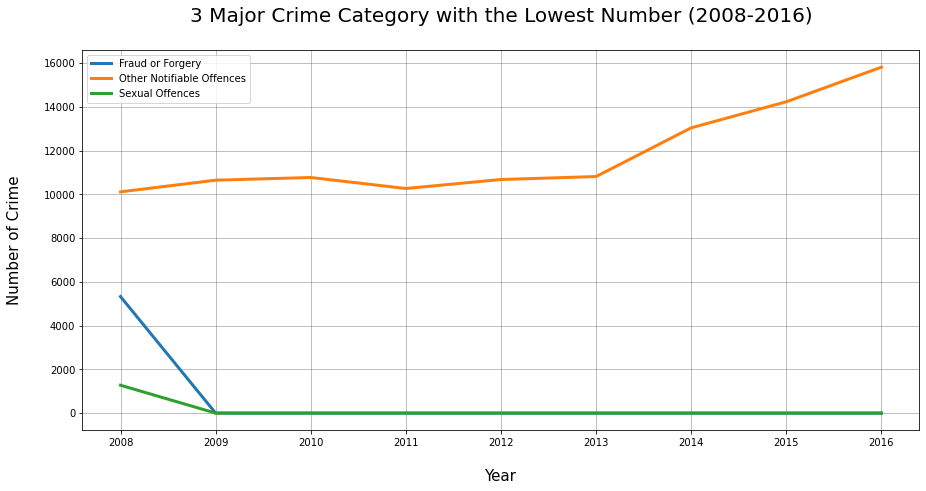

In [22]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_least3major.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("3 Major Crime Category with the Lowest Number (2008-2016)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

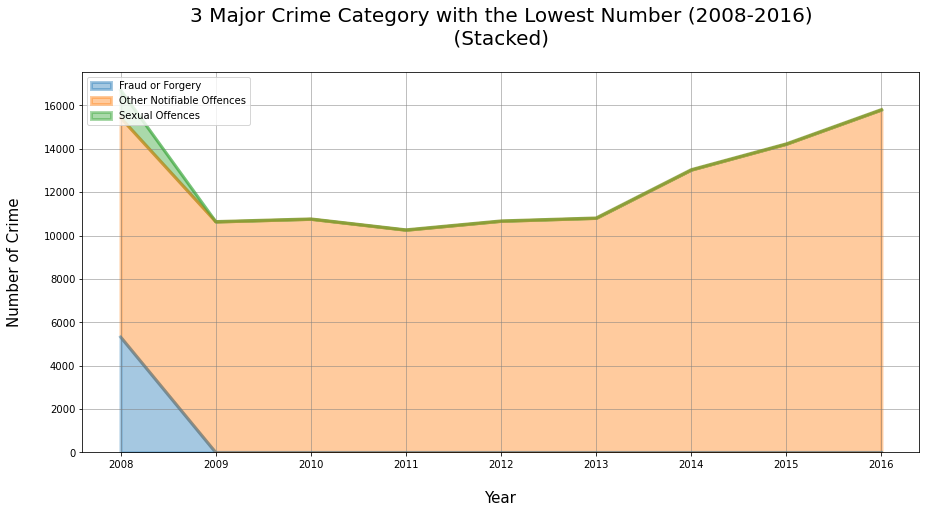

In [24]:
# STACKED AREA PLOT
df_least3major.plot(kind="area",
                    figsize=(15, 7),
                    alpha=0.4,
                    stacked=True,
                    linewidth=3)
plt.title(
    "3 Major Crime Category with the Lowest Number (2008-2016)\n (Stacked) \n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

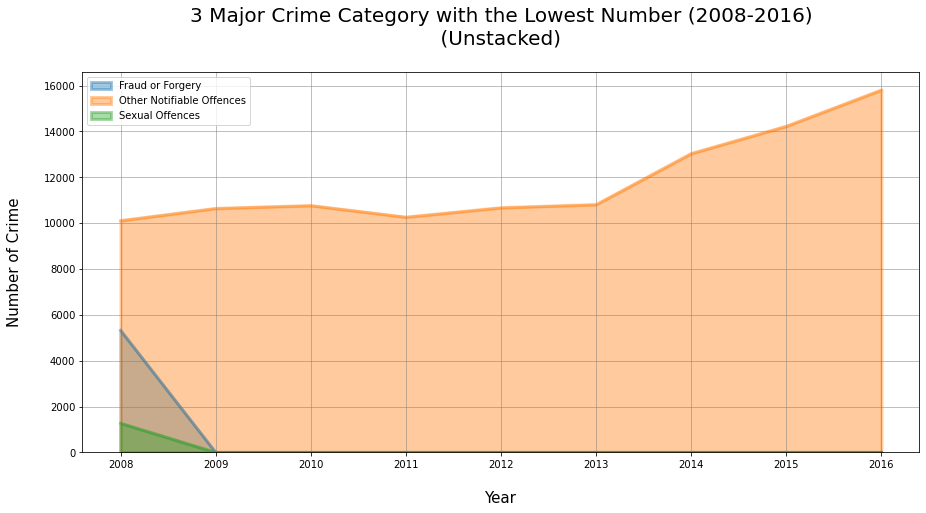

In [25]:
# UNSTACKED AREA PLOT
df_least3major.plot(kind="area",
                    figsize=(15, 7),
                    alpha=0.4,
                    stacked=False,
                    linewidth=3)
plt.title(
    "3 Major Crime Category with the Lowest Number (2008-2016)\n (Unstacked) \n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot diatas, dapat diketahui bahwa `Sexual Offences` dan `Fraud of Forgery` adalah kajahatan yang memiliki jumlah tren terendah dari tahun 2008-2016 dan hanya terjadi di tahun 2008, sehingga di tahun berikutnya sampai dengan tahun 2016, tidak ada kasus Sexual Offences dan Fraud of Forgery di wilayah metropolitan London. Sedangkan untuk kategori Other Notifiable Offences adalah kategori dengan jumlah terendah juga tetapi memiliki tren naik dari tahun 2008 sampai 2016 dan mencapai jumlah tertinggi di tahun 2016.

---
**Question:** Kategori minor kejahatan apa saja yang memiliki jumlah tertinggi selama tahun 2008-2016?

In [27]:
top5_minor = df.drop(["lsoa_code","borough","major_category","month"], axis=1).set_index("year")
top5_minor = top5_minor.groupby("minor_category").sum()
top5_minor = top5_minor.sort_values(by="value", ascending=False).head(5)
top5_minor

,value
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001


**`Other Theft`** adalah kategori minor yang memiliki jumlah tertinggi selama tahun 2008-2016.

In [28]:
df_top5minor = df.drop(["lsoa_code","borough","major_category","month"], axis=1).set_index("minor_category")
df_top5minor = df_top5minor.loc[top5_minor.index]
df_top5minor = pd.pivot_table(df_top5minor, values="value", aggfunc=np.sum, index="year", columns="minor_category")
df_top5minor

minor_category,Assault with Injury,Burglary in a Dwelling,Harassment,Other Theft,Theft From Motor Vehicle
year,,,,,
2008,56586,56655,43389,99280,76570
2009,55297,60185,43594,95424,68856
2010,54173,57123,42808,103997,69709
2011,50768,62439,37493,113616,69604
2012,50369,61716,43396,132056,68198
2013,39929,56537,41805,115757,63509
2014,45677,48975,55330,108577,52167
2015,48164,44656,71633,107571,50024
2016,50038,42996,78676,103807,51319


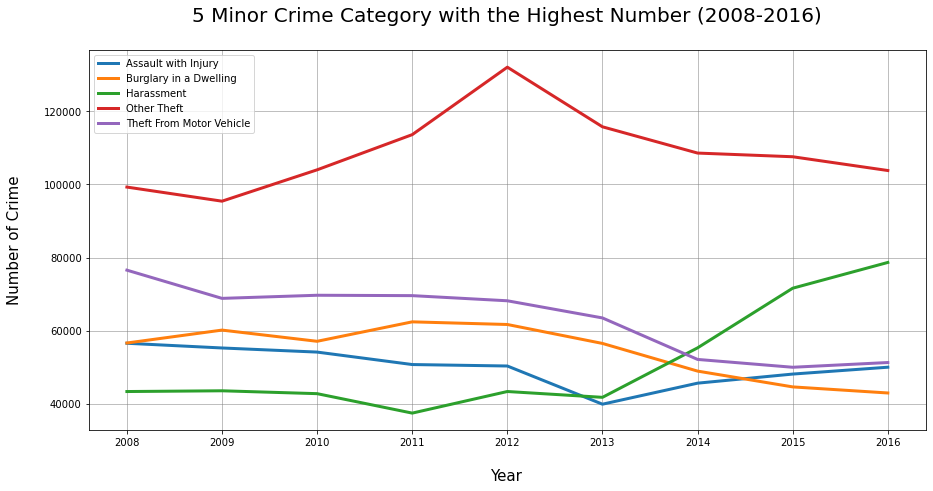

In [29]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top5minor.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("5 Minor Crime Category with the Highest Number (2008-2016)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

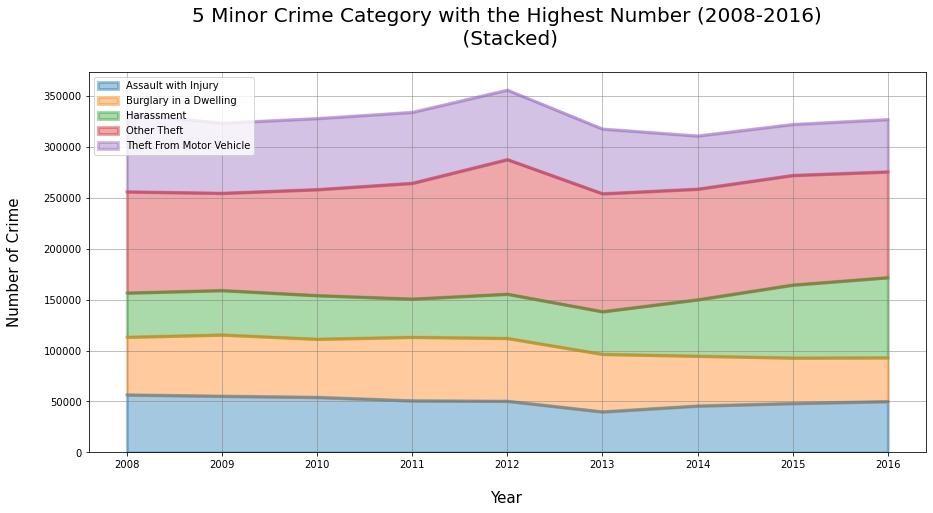

In [30]:
#STACKED AREA PLOT
df_top5minor.plot(kind="area", 
                  figsize=(15,7),
                  alpha=0.4,
                  stacked=True,
                 linewidth=3)
plt.title("5 Minor Crime Category with the Highest Number (2008-2016)\n (Stacked)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

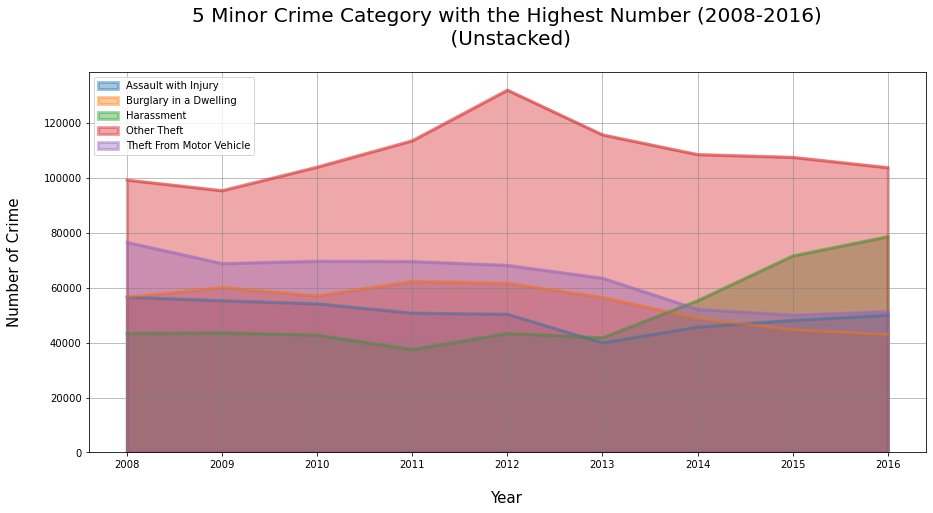

In [31]:
#UNSTACKED AREA PLOT
df_top5minor.plot(kind="area", 
                  figsize=(15,7),
                  alpha=0.4,
                  stacked=False,
                 linewidth=3)
plt.title("5 Minor Crime Category with the Highest Number (2008-2016)\n (Unstacked)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot diatas, `Other theft` adalah kategori minor kejahatan/kriminal di wilayah metropolitan London dengan jumlah yang tertinggi dan diikuti dengan Theft From Motor Vehicle, Burglary in Dwelling, Harrasment, dan Assault with Injury. Kategori pencurian ini juga memiliki jumlah yang tinggi dan cukup signifikan perbedaannya apabila dibandingkan dengan kategori lain.